In [48]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
traj_path = './dataset_npz/zara1/agent.npz'
trajs = np.load(traj_path, allow_pickle=True)

In [37]:
def get_traj(index: int):
    agent = trajs[str(index)].item()
    obs = agent['_traj']
    future = agent['_traj_future']
    return np.concatenate([obs, future], axis=-2)

In [38]:
get_traj(10)

array([[ 5.1551, 11.828 ],
       [ 5.2111, 11.382 ],
       [ 5.2675, 10.937 ],
       [ 5.3235, 10.491 ],
       [ 5.346 , 10.071 ],
       [ 5.346 ,  9.6679],
       [ 5.346 ,  9.2649],
       [ 5.346 ,  8.8618],
       [ 5.346 ,  8.4588],
       [ 5.3963,  8.0318],
       [ 5.4522,  7.6018],
       [ 5.508 ,  7.172 ],
       [ 5.5639,  6.742 ],
       [ 5.6164,  6.3209],
       [ 5.6562,  5.9351],
       [ 5.6961,  5.5493],
       [ 5.7357,  5.1633],
       [ 5.7756,  4.7776],
       [ 5.8209,  4.4029],
       [ 5.8746,  4.0451]], dtype=float32)

In [46]:
def fft(trajs):
    xf = np.fft.fft(trajs[:, 0])
    yf = np.fft.fft(trajs[:, 1])

    xr = np.real(xf)
    yr = np.real(yf)
    xi = np.imag(xf)
    yi = np.imag(yf)

    return [np.abs(xr + 1.0j * xi), np.arctan(xi/xr),
            np.abs(yr + 1.0j * yi), np.arctan(yi/yr)]

In [91]:
def reverse(seq):
    h = len(seq)//2
    return np.concatenate([seq[h:], seq[:h]], axis=0)

In [153]:
def draw(traj, r=True):
    x = traj[:, 0]
    y = traj[:, 1]
    xa, xp, ya, yp = fft(traj)

    if r:
        xa = reverse(xa)
        xp = reverse(xp)
        ya = reverse(ya)
        yp = reverse(yp)

    plt.figure(figsize=(14, 2))
    plt.subplot(1, 3, 1)
    plt.axis('equal')
    plt.scatter(x, y)

    plt.subplot(1, 3, 2)
    plt.plot(xa, '--o')
    plt.plot(ya, '--o')

    plt.subplot(1, 3, 3)
    plt.plot(xp, '--o')
    plt.plot(yp, '--o')

In [154]:
index = 190

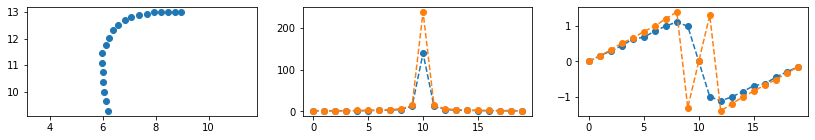

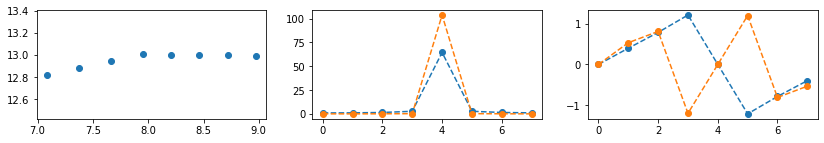

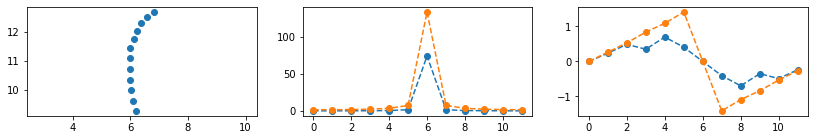

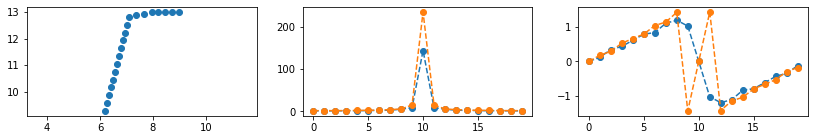

In [165]:
traj = get_traj(index)
draw(traj)
draw(traj[0:8])
draw(traj[8:])

traj_lin_pred = np.linspace(traj[7], traj[-1], 13)
traj_lin = np.concatenate([traj[0:7], traj_lin_pred], axis=-2)
draw(traj_lin)

index += 10

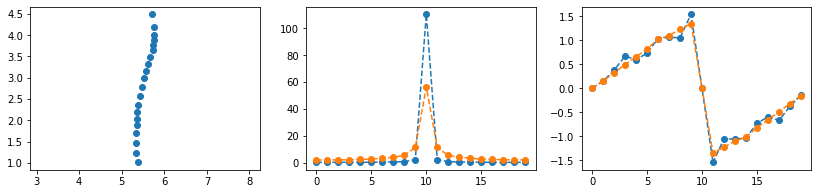

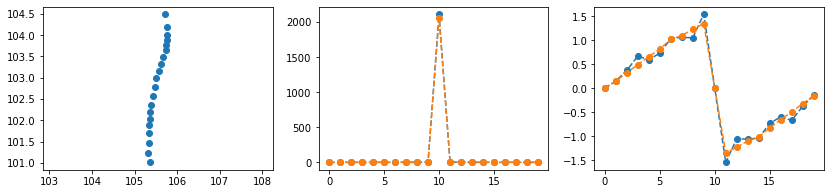

In [102]:
traj = get_traj(190)

draw(traj)
draw(traj+100)

<ipython-input-46-d53f911d5a24>:11: RuntimeWarning: invalid value encountered in true_divide
  np.abs(yr + 1.0j * yi), np.arctan(yi/yr)]


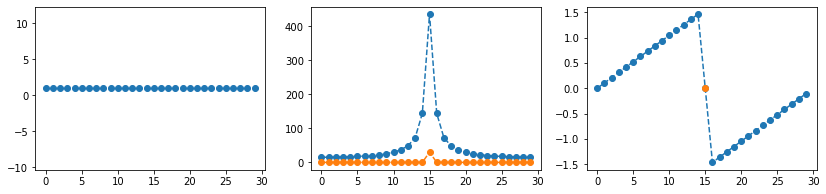

In [108]:
draw(np.array([np.arange(30), np.ones(30)]).T)

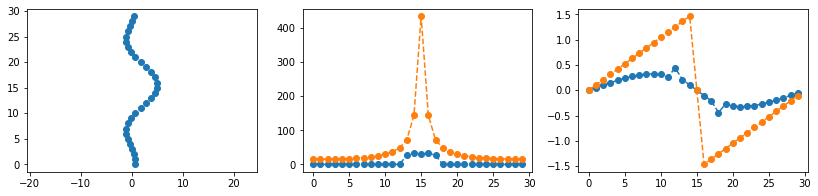

In [128]:
x = np.arange(30) - 15.5
draw(np.array([5*np.sin(x/2)/(x/2), np.arange(30)]).T)